In [100]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from unidip.dip import dip_fn, diptst

from itertools import product

import sys
sys.path.append('../')
from src.clusterability.dataset import Dataset
from src.clusterability.dataset import PRECOMPUTED_DTW_LIMIT, PRECOMPUTED_EUCL_LIMIT, CONDITIONS, PRECOMPUTED_LENGTHS
from helpers import cm2inch

In [110]:
dataset = Dataset('creighton-phrase')

In [111]:
outcomes = []
for repres, metrics in CONDITIONS.items():
    for metric, length, unique in product(
        metrics, PRECOMPUTED_LENGTHS, [True, False]
    ):
        settings = dict(
            representation=repres,
            metric=metric,
            length=length, 
            unique=unique,
            limit=PRECOMPUTED_DTW_LIMIT
                if metric == "dtw"
                else PRECOMPUTED_EUCL_LIMIT
        )
        outcome = dataset.dist_dip_test(**settings, read_only=True)
        if outcome:
            name = dataset.subset_name(**{k: settings[k] for k in ['length', 'unique', 'limit']})
            name = f'{repres}-{metric}-{name}'
            outcome.pop('xs')
            outcome.pop('cdf')
            settings.update(outcome)
            settings['name'] = name
            outcomes.append(settings)
        

In [112]:
df = pd.DataFrame(outcomes).set_index('name')
df.loc[df['length'].isnull(), 'length'] = 'all'

In [113]:
from matplotlib.colors import LogNorm
from matplotlib.colors import TwoSlopeNorm

In [114]:
# alpha = 0.05
# normalize = matplotlib.colors.TwoSlopeNorm(vcenter=0.05, vmin=0, vmax=1)
# twoslopes = TwoSlopeNorm(vcenter=0.05, vmin=0, vmax=1)

<AxesSubplot:xlabel='representation-metric', ylabel='length'>

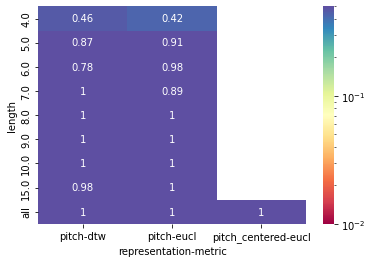

In [115]:
sns.heatmap(
    df.query('unique==True').pivot_table(
        values='pval', 
        index='length', 
        columns=['representation', 'metric']),
    annot=True,
    norm=LogNorm(vmin=1e-2, vmax=.5),
    cmap = 'Spectral'
)

In [15]:
sims = dataset.similarities('pitch', 'eucl', unique=False, length=None, limit=PRECOMPUTED_EUCL_LIMIT)

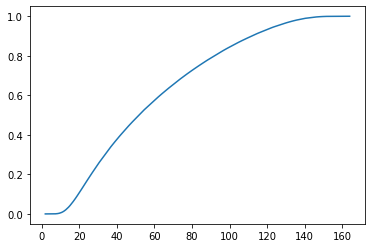

In [14]:
plt.plot(results['xs'], results['cdf'])